<a href="https://colab.research.google.com/github/sitiaisyah14/pengujian_parameter/blob/main/Iterasi_ke_2_Dinamis_Fiks_Preprocessing_%2B_MLP_%2B_AG_Alhamdulillah_Berhasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer #untuk missing value
from sklearn.preprocessing import OneHotEncoder #untuk encoding input ke one hot encoding
from sklearn.compose import ColumnTransformer #untuk encoding input ke one hot encoding
from sklearn.preprocessing import MinMaxScaler #untuk normalisasi
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

# **Import Data**

In [ ]:
import os;
os.remove('datacuaca.csv') if os.path.exists('datacuaca.csv') else None

from google.colab import files
uploaded = files.upload()

Saving datacuaca.csv to datacuaca.csv


In [ ]:
#Membaca Data

data_cuaca = pd.read_csv('datacuaca.csv', delimiter=';')
data_cuaca.head(5)

,Local time in Surabaya / Perak,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.10.2023 22:00,30.1,758.3,758.5,1.3,73.0,Wind blowing from the east-southeast,4.0,NaN,NaN,...,Altostratus translucidus.,"Cirrus fibratus, sometimes uncinus, not progre...",7.0,24.7,NaN,NaN,NaN,NaN,NaN,NaN
1,31.10.2023 19:00,30.8,757.0,757.3,2.3,68.0,Wind blowing from the south-southeast,6.0,NaN,NaN,...,Altostratus opacus or Nimbostratus.,"Cirrus fibratus, sometimes uncinus, not progre...",8.0,24.3,NaN,NaN,NaN,NaN,NaN,NaN
2,31.10.2023 16:00,33.7,754.7,755.0,-1.4,54.0,Wind blowing from the south-east,5.0,NaN,NaN,...,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",12.0,23.2,NaN,NaN,NaN,NaN,NaN,NaN
3,31.10.2023 13:00,36.0,756.1,756.4,-2.2,47.0,Wind blowing from the east-southeast,4.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",12.0,22.9,NaN,NaN,NaN,NaN,NaN,NaN
4,31.10.2023 10:00,33.2,758.3,758.6,0.0,61.0,Wind blowing from the south-east,4.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",12.0,24.6,NaN,NaN,NaN,NaN,NaN,NaN


# **Fungsi Preprocessing**
*   Missing Value
*   Encoding
*   Normalisasi

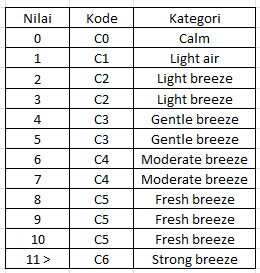





In [ ]:
def encoding_ff(df):
  Ff_encoder = {
    0: 0,
    1: 1,
    2: 2,
    3: 2,
    4: 3,
    5: 3,
    6: 4,
    7: 4,
    8: 5,
    9: 5,
    10: 5
  }
  # Melakukan mapping pada kolom Ff
  # Menambahkan aturan untuk nilai lebih dari 10.0
  df['Ff'] = df['Ff'].apply(lambda x: Ff_encoder[x] if x in Ff_encoder else 6)
  return df

In [ ]:
def preprocessing_data(df):
  #menghapus prameter yang datanya tidak lengkap
  drop_fitur_null = ["Local time in Surabaya / Perak", 'ff10', 'ff3', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'RRR', 'tR', 'E', 'Tg', "E'", 'sss']
  df = df.drop(columns=drop_fitur_null)

  #proses Missing Value Kolom Angka
  kolom_angka = ['T', 'Po', 'P', 'Pa', 'U', 'Td',  'Ff']
  imputer_angka = KNNImputer(n_neighbors=5)
  df[kolom_angka] = imputer_angka.fit_transform(df[kolom_angka])

  #Proses Missing Value Kolom Kategorikal
  kolom_kategori = ['DD', 'N', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV']
  imputer_kategori = KNNImputer(n_neighbors=5)
  for kolom in kolom_kategori:
    df[kolom] = df[kolom].astype('category')  # Ubah kolom kategorikal menjadi tipe kategori
    df[kolom] = df[kolom].cat.codes  # Konversi kategori menjadi kode numerik

  imputer_kategori = KNNImputer(n_neighbors=5)
  df[kolom_kategori] = imputer_kategori.fit_transform(df[kolom_kategori])


  #proses encoding untuk data kategori
  # Membuat objek OneHotEncoder
  encoder = OneHotEncoder(sparse=False, drop='first')
  # Membuat transformer untuk mengaplikasikan one-hot encoding pada kolom kategorikal tertentu
  transformer = ColumnTransformer(transformers=[('onehot', encoder, kolom_kategori)], remainder='passthrough')
  # Melakukan transformasi pada DataFrame
  df_encoded = transformer.fit_transform(df)

  #proses encoding kolom Ff
  encoding_ff(df)

  #proses normalisasi data
  scaler = MinMaxScaler()
  # Menentukan kolom yang akan dinormalisasi (kecuali 'Ff')
  cols_to_normalize = df.columns.difference(['Ff'])
  # Melakukan normalisasi hanya pada kolom yang ditentukan
  df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

  #duplikat data menjadi csv
  df = df.drop_duplicates()
  df.to_csv('datacuaca.csv', index=False)
  return df

data_cuaca = preprocessing_data(data_cuaca)
data_cuaca.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,T,Po,P,Pa,U,DD,Ff,N,Cl,Nh,H,Cm,Ch,VV,Td
0,0.537879,0.425806,0.613208,0.567416,0.600000,0.235294,3,0.750,0.4,0.555556,0.875,0.8,0.6,0.8125,0.771930
1,0.590909,0.341935,0.500000,0.623596,0.523077,0.705882,4,0.750,0.5,0.444444,0.875,0.7,0.6,0.8750,0.736842
2,0.810606,0.193548,0.283019,0.415730,0.307692,0.647059,3,0.375,0.5,0.333333,0.875,0.4,0.6,0.5000,0.640351
3,0.984848,0.283871,0.415094,0.370787,0.200000,0.235294,3,0.000,0.5,0.111111,0.875,0.9,0.6,0.5000,0.614035
4,0.772727,0.425806,0.622642,0.494382,0.415385,0.647059,3,0.250,0.6,1.000000,0.500,0.9,0.6,0.5000,0.763158


# **Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def training_testing (data):
    # Spliting data into Feature and Target
    X = data.drop('Ff', axis=1)  # data training kecuali kolom Ff
    y = data['Ff']

    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

    print("Jumlah data dalam X_train:", len(X_train))
    print("Jumlah data dalam X_test:", len(X_test))
    # print("Jumlah kelas:", num_classes)


    return X_train, X_test, y_train, y_test

# Panggil fungsi dengan data_cuaca Anda
X_train, X_test, y_train, y_test = training_testing(data_cuaca)

Jumlah data dalam X_train: 5754
Jumlah data dalam X_test: 2467


In [ ]:
# Sebelum memanggil fungsi training_testing
unique_classes = np.unique(data_cuaca['Ff'])
num_classes = len(unique_classes)
print("Jumlah kelas setelah normalisasi:", unique_classes)
print("Jumlah kelas setelah normalisasi:", num_classes)

Jumlah kelas setelah normalisasi: [0 1 2 3 4 5 6]
Jumlah kelas setelah normalisasi: 7


In [ ]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


Unique values in y_train: [0 1 2 3 4 5 6]
Unique values in y_test: [0 1 2 3 4 5 6]


# **Multi-Layer Perceptron - Fitness Function**

In [ ]:
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
from keras import initializers

# Define custom initializers for weights
custom_weight_initializer = initializers.RandomUniform(minval=0, maxval=1)
#custom_bias_initializer = initializers 0
custom_bias_initializer = initializers.Zeros

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=7)
y_test_one_hot = to_categorical(y_test, num_classes=7)

def fitness_function(X_train, X_test, y_train, y_test):
  # Create a Sequential model
  model = Sequential()

  # Add a sigmoid input layer
  model.add(Dense(10, input_dim=14, activation='sigmoid', kernel_initializer=custom_weight_initializer, bias_initializer=custom_bias_initializer))

  # Add a softmax output layer
  model.add(Dense(7, activation='softmax', kernel_initializer=custom_weight_initializer, bias_initializer=custom_bias_initializer))

  # Print the model summary
  #model.summary()

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  # Train the model
  model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_one_hot))

  # Evaluate the model on the test set
  y_pred_one_hot = model.predict(X_test)
  y_pred = np.argmax(y_pred_one_hot, axis=1)

  # Convert labels back to integer format
  y_test_int = np.argmax(y_test_one_hot, axis=1)

  # Calculate F1-Score
  f1 = f1_score(y_test_int, y_pred, average='weighted')  # average='weighted' sesuai dengan jumlah kelas yang diimbangi
  print('Test F1-Score:', f1)

fitness_function(X_train, X_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
180/180 [==============================] - 2s 4ms/step - loss: 1.4572 - accuracy: 0.5047 - val_loss: 1.3675 - val_accuracy: 0.5022
Epoch 2/10
180/180 [==============================] - 0s 3ms/step - loss: 1.3484 - accuracy: 0.5047 - val_loss: 1.3402 - val_accuracy: 0.5022
Epoch 3/10
180/180 [==============================] - 0s 2ms/step - loss: 1.3323 - accuracy: 0.5047 - val_loss: 1.3318 - val_accuracy: 0.5022
Epoch 4/10
180/180 [==============================] - 0s 3ms/step - loss: 1.3248 - accuracy: 0.5047 - val_loss: 1.3314 - val_accuracy: 0.5022
Epoch 5/10
180/180 [==============================] - 0s 2ms/step - loss: 1.3208 - accuracy: 0.5047 - val_loss: 1.3231 - val_accuracy: 0.5022
Epoch 6/10
180/180 [==============================] - 0s 3ms/step - loss: 1.3154 - accuracy: 0.5047 - val_loss: 1.3181 - val_accuracy: 0.5022
Epoch 7/10
180/180 [==============================] - 0s 3ms/step - loss: 1.3099 - accuracy: 0.5047 - val_loss: 1.3143 - val_accuracy: 0.5022
Epoch 

# **Algoritma Genetika dan Fungsi Fitness MLP**

## **Kekurangan**
- Penyesuaian proses sesuai fitur yang terpilih `calculate_fitness` dan `top_feature`
- Perlu dicoba menggunakan epoch yang lebih tinggi
- Mempelajari terkait `One_Hot_Encoding` setelah fungsi softmax
- mencetak offspring hasil crossover dan mutasi

In [ ]:
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
import random
import statistics
from keras import initializers
import math
from tqdm import tqdm

In [ ]:
def calculate_fitness(X_train, X_test, y_train, y_test):
    #Define custom initializers for weights and biases
    custom_weight_initializer = initializers.RandomUniform(minval=0, maxval=1)
    custom_bias_initializer = initializers.Zeros

    # Convert target to one-hot encoding
    y_train_one_hot = to_categorical(y_train, num_classes=7)
    y_test_one_hot = to_categorical(y_test, num_classes=7)

    # Create a Sequential model
    model = Sequential()
    # Add a sigmoid input layer
    model.add(Dense(6, input_dim=X_train.shape[1], activation='sigmoid', kernel_initializer=custom_weight_initializer, bias_initializer=custom_bias_initializer))
    # Add a softmax output layer
    model.add(Dense(7, activation='softmax', kernel_initializer=custom_weight_initializer, bias_initializer=custom_bias_initializer))
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
    # Train the model
    model.fit(X_train, y_train_one_hot, epochs=50, batch_size=128, validation_data=(X_test, y_test_one_hot), verbose=0)


    # Prediksi menggunakan model
    y_pred_one_hot = model.predict(X_test)
    y_pred = np.argmax(y_pred_one_hot, axis=1)
    # Konversi label kembali ke format integer
    y_test_int = np.argmax(y_test_one_hot, axis=1)

    # Hitung f1_score
    f1 = f1_score(y_test_int, y_pred, average='weighted')
    #print('F1-Score:', f1)
    return f1

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="The initializer RandomUniform is unseeded and being called multiple times")


In [ ]:
def init_population(n,c):
    return np.array([[math.ceil(e) for e in pop] for pop in (np.random.rand(n,c)-0.5)]), np.zeros((2,c))-1

def single_point_crossover(population, crossover_probability):
    r, c = population.shape[0], population.shape[1]
    num_crossovers = math.ceil(crossover_probability * r)  # Menentukan berapa banyak operasi crossover yang akan dilakukan
    print('Jumlah Crossover', num_crossovers)
    offspring_list = []
    for idx in range(num_crossovers):
        i, j = np.random.choice(r, size=2, replace=False)  # Memilih dua indeks individu acak untuk crossover
        n = np.random.randint(1, c)  # Memilih titik crossover acak
        offspring = np.append(population[i][:n], population[j][n:])
        offspring_list.append(offspring)
        # Print hasil offspring setiap crossover
        # print(f"Crossover: {idx+1}")
        # print(f"Offspring: {offspring_list[idx]}")
    return np.array(offspring_list)


def flip_mutation(population, mutation_probability):
    r, c = population.shape[0], population.shape[1]
    num_mutations = math.ceil(mutation_probability * r )
    print('Jumlah Mutations : ', num_mutations)
    offspring_list = []
    for idx in range(num_mutations):
        i, j = np.random.randint(r), np.random.randint(c)  # Memilih indeks individu dan gen acak untuk mutasi
        offspring = population[i].copy()
        offspring[j] = 1 - offspring[j]  # Flip mutation
        offspring_list.append(offspring)
        # Print hasil offspring setiap mutation
        # print(f"Mutation: {idx+1}")
        # print(f"Offspring: {offspring_list[idx]}")
    return np.array(offspring_list)

def elitism_selection(population, offspring, fitness, offspring_fitness, elite_size):
    # Gabungkan populasi awal, offspring crossover, dan offspring mutasi
    total_population = np.vstack((population, offspring))
    total_fitness = np.concatenate((fitness, offspring_fitness))

    # Mengurutkan total populasi berdasarkan total fitness, dari yang terbesar ke yang terkecil
    sorted_indices = np.argsort(total_fitness)[::-1]


    # Memilih elite_size individu terbaik dari total populasi yang telah diurutkan
    elite_population = total_population[sorted_indices[:elite_size], :].copy()
    elite_fitness = total_fitness[sorted_indices[:elite_size]]  # Memastikan fitness sesuai dengan populasi elit

    # print("Populasi Baru :")
    # for i, indv in enumerate(elite_population):
    #     print("[{}] | Fitness: {}".format(' '.join(map(str, indv)), elite_fitness[i]))

    return elite_population, elite_fitness

def get_fitness(data, feature_list, target, population):
    fitness = []
    for i in range(population.shape[0]):
        columns = [feature_list[j] for j in range(population.shape[1]) if population[i,j]==1]
        fitness.append(calculate_fitness(X_train, X_test, y_train, y_test))
    return fitness

In [ ]:
def ga(data, feature_list, target, n, max_iter, crossover_probability, mutation_probability):
    c = len(feature_list)
    population, memory = init_population(n, c)
    fitness = get_fitness(data, feature_list, target, population)
    optimal_solution = population[np.argmax(fitness)]  # Mengambil solusi terbaik dari populasi awal
    optimal_value = max(fitness)  # Mengambil nilai fitness terbaik dari populasi awal

    print("Inisialisasi Populasi:")
    for i in range(len(population)):
          print(population[i], "| Fitness:", fitness[i])


    for i in tqdm(range(max_iter)):
        print("\n                        Iteration:", i+1)

        print("======================= Hasil Offspring Crossover ======================")
        offspring_crossover = single_point_crossover(population, crossover_probability)
        offspring_crossover_fitness = get_fitness(data, feature_list, target, offspring_crossover)
        for i in range(len(offspring_crossover)):
          print("Crossover:", i+1)
          print("Offspring:", offspring_crossover[i], "| Fitness:", offspring_crossover_fitness[i])


        print("======================== Hasil Offspring Mutasi =========================")
        offspring_mutation = flip_mutation(population, mutation_probability)
        offspring_mutation_fitness = get_fitness(data, feature_list, target, offspring_mutation)
        for i in range(len(offspring_mutation)):
          print("\nMutasi:", i+1)
          print("Offspring:", offspring_mutation[i], "| Fitness:", offspring_mutation_fitness[i])

        # Gabungkan offspring dari crossover dan mutasi
        offspring = np.vstack((offspring_crossover, offspring_mutation))
        offspring_fitness = np.concatenate((offspring_crossover_fitness, offspring_mutation_fitness))

        print("======================== Hasil Seleksi =========================")
        elite_population, elite_fitness = elitism_selection(population, offspring, fitness, offspring_fitness, n)

        # Update populasi dan fitness dengan populasi elit yang baru dipilih
        population = elite_population
        fitness = elite_fitness

        # Cetak hasil seleksi elitisme
        print("Populasi Baru Setelah Seleksi Elitisme:")
        for i, indv in enumerate(elite_population):
            print("[{}] | Fitness: {}".format(' '.join(map(str, indv)), elite_fitness[i]))


        # Memperbarui nilai optimal jika ditemukan solusi yang lebih baik dari populasi elit
        if max(fitness) > optimal_value:
            optimal_value = max(fitness)
            optimal_solution = population[np.argmax(fitness)]  # Mengambil solusi terbaik dari populasi baru setelah seleksi elitisme

        # Mencetak nilai dan solusi optimal terakhir yang diperbarui (berdasarkan populasi baru jika ada perubahan)
        print("\nOptimal Value:", optimal_value)
        print("Optimal Solution:", optimal_solution)

        # Mencetak nilai maksimum fitness dan solusi terbaik dari populasi baru pada iterasi tertentu.
        # print("\nOptimal Value:", max(fitness_new))  # Memperbarui optimal value dengan nilai maksimum fitness baru
        # print("Optimal Solution:", population_new[np.argmax(fitness_new)])  # Memperbarui optimal solution dari populasi baru

    return optimal_solution, optimal_value


In [ ]:

# Execute Genetic Algorithm to obtain Important Feature
target = ['Ff']
feature_list = [i for i in data_cuaca.columns if i not in target]

feature_set, acc_score = ga(data_cuaca, feature_list, target, 5, 100, crossover_probability=0.7, mutation_probability=0.3)
print("Fitur Set Terpilih", feature_set)
# Filter Selected Features
selected_indices = [i for i, val in enumerate(feature_set) if val == 1]
selected_features = [feature_list[i] for i in selected_indices]

# Print List of Features
print('Optimal Feature Set\n', selected_features, '\nOptimal Accuracy =', round(acc_score * 100), '%')


78/78 [==============================] - 0s 2ms/step
Inisialisasi Populasi:
[0 0 1 0 1 0 0 0 0 1 1 1 0 1] | Fitness: 0.4830221361954646
[0 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.4612924220255204
[1 1 0 0 0 1 1 0 0 0 0 0 1 1] | Fitness: 0.46725219843056376
[1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5221785460230138
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945


  0%|          | 0/100 [00:00<?, ?it/s]


                        Iteration: 1
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 1 0 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.4423073331422892
Crossover: 2
Offspring: [1 1 0 0 0 1 1 0 0 0 0 0 0 1] | Fitness: 0.45929924310679077
Crossover: 3
Offspring: [0 0 1 0 1 0 0 0 0 1 1 1 1 0] | Fitness: 0.48446591656342863
Crossover: 4
Offspring: [0 0 1 1 0 1 1 0 0 1 1 1 0 1] | Fitness: 0.5054770517021877
======================== Hasil Offspring Mutasi =========================
Jumlah Mutations :  2
78/78 [==============================] - 0s 1ms/step


  1%|          | 1/100 [00:59<1:38:32, 59.73s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188

Mutasi: 2
Offspring: [1 1 0 0 0 1 1 0 0 0 0 1 1 1] | Fitness: 0.45695918824440535
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945
[1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5221785460230138
[0 0 1 1 0 1 1 0 0 1 1 1 0 1] | Fitness: 0.5054770517021877
[0 0 1 0 1 0 0 0 0 1 1 1 1 0] | Fitness: 0.48446591656342863

Optimal Value: 0.5250117317032188
Optimal Solution: [1 0 1 0 0 0 1 0 1 0 1 0 1 0]

                        Iteration: 2
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 0 1] | Fitness: 0.46476700017893036
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.47434550112

  2%|▏         | 2/100 [01:56<1:34:28, 57.84s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 0 0 1 1 1 0 1] | Fitness: 0.5163647791121864

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 0 1 1 0 0 1] | Fitness: 0.4631731791712272
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945
[1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5221785460230138
[0 0 1 1 1 1 1 0 0 1 1 1 0 1] | Fitness: 0.5163647791121864
[0 0 1 1 0 1 1 0 0 1 1 1 0 1] | Fitness: 0.5054770517021877

Optimal Value: 0.5250117317032188
Optimal Solution: [1 0 1 0 0 0 1 0 1 0 1 0 1 0]

                        Iteration: 3
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [0 0 1 1 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.46600699399873596
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.4616815307911

  3%|▎         | 3/100 [02:49<1:30:08, 55.76s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.46377460661826914

Mutasi: 2
Offspring: [1 0 1 0 0 1 0 1 0 1 1 0 0 1] | Fitness: 0.4795434094356449
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945
[1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5221785460230138
[0 0 1 1 1 1 1 0 0 1 1 1 0 1] | Fitness: 0.5163647791121864
[0 0 1 1 0 1 1 0 0 1 1 1 0 1] | Fitness: 0.5054770517021877

Optimal Value: 0.5250117317032188
Optimal Solution: [1 0 1 0 0 0 1 0 1 0 1 0 1 0]

                        Iteration: 4
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.46529902032622683
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 0 1 1 0 0 1] | Fitness: 0.515373800535

  4%|▍         | 4/100 [03:48<1:31:28, 57.17s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 0 0 0 1] | Fitness: 0.47665203169041875

Mutasi: 2
Offspring: [1 0 1 0 0 0 1 0 1 0 0 0 1 0] | Fitness: 0.45126073106147213
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945
[1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5221785460230138
[0 0 1 1 1 1 1 0 0 1 1 1 0 1] | Fitness: 0.5163647791121864
[0 0 1 1 0 1 1 0 0 1 1 0 0 1] | Fitness: 0.5153738005354145

Optimal Value: 0.5250117317032188
Optimal Solution: [1 0 1 0 0 0 1 0 1 0 1 0 1 0]

                        Iteration: 5
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 1 1 0 1 1 0 0 1] | Fitness: 0.46685237067417806
Crossover: 2
Offspring: [1 0 1 0 0 0 1 0 0 1 1 0 0 1] | Fitness: 0.48158567190

  5%|▌         | 5/100 [04:46<1:30:41, 57.28s/it]


Mutasi: 1
Offspring: [0 1 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.4588973729554583

Mutasi: 2
Offspring: [0 0 1 1 0 1 0 0 0 1 1 0 0 1] | Fitness: 0.44741684028083595
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945
[1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5221785460230138
[0 0 1 1 1 1 1 0 0 1 1 1 0 1] | Fitness: 0.5163647791121864
[0 0 1 1 0 1 1 0 0 1 1 0 0 1] | Fitness: 0.5153738005354145

Optimal Value: 0.5250117317032188
Optimal Solution: [1 0 1 0 0 0 1 0 1 0 1 0 1 0]

                        Iteration: 6
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.4644605487649621
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 0 1 1 0 0 1] | Fitness: 0.4588208846812

  6%|▌         | 6/100 [05:45<1:30:49, 57.97s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 1 1 0 0 1 1 0 0 1] | Fitness: 0.45729510406629453

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 1 1 1 1 0 1] | Fitness: 0.4626660239141392
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945
[1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5221785460230138
[0 0 1 1 1 1 1 0 0 1 1 1 0 1] | Fitness: 0.5163647791121864
[0 0 1 1 0 1 1 0 0 1 1 0 0 1] | Fitness: 0.5153738005354145

Optimal Value: 0.5250117317032188
Optimal Solution: [1 0 1 0 0 0 1 0 1 0 1 0 1 0]

                        Iteration: 7
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 1 1 0 0 1 1 0 0 1] | Fitness: 0.47678486407697207
Crossover: 2
Offspring: [1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842

  7%|▋         | 7/100 [06:42<1:29:11, 57.55s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 0 0] | Fitness: 0.48451324755192937

Mutasi: 2
Offspring: [0 0 1 1 0 1 0 0 0 1 1 0 0 1] | Fitness: 0.47475729424037805
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945
[1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5221785460230138
[0 0 1 1 1 1 1 0 0 1 1 1 0 1] | Fitness: 0.5163647791121864

Optimal Value: 0.526450342842783
Optimal Solution: [1 0 1 0 0 1 1 0 0 0 1 0 0 1]

                        Iteration: 8
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 0 1 1 1 0 1] | Fitness: 0.45878936814295945
Crossover: 2
Offspring: [1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5208080202236

  8%|▊         | 8/100 [07:39<1:28:15, 57.56s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 0 0 1 0] | Fitness: 0.5178323238214706

Mutasi: 2
Offspring: [0 0 1 1 0 0 1 0 0 0 1 0 0 1] | Fitness: 0.44282264648858194
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945
[1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5221785460230138
[1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5208080202236196

Optimal Value: 0.526450342842783
Optimal Solution: [1 0 1 0 0 1 1 0 0 0 1 0 0 1]

                        Iteration: 9
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.4346444885995601
Crossover: 2
Offspring: [1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.460812979832371

  9%|▉         | 9/100 [08:38<1:27:40, 57.81s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 1 1 1 1 0 0 1] | Fitness: 0.4582494270634026

Mutasi: 2
Offspring: [0 1 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5202373331763362
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945
[1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5221785460230138
[1 0 1 0 0 0 0 1 0 1 1 0 0 1] | Fitness: 0.5208080202236196

Optimal Value: 0.526450342842783
Optimal Solution: [1 0 1 0 0 1 1 0 0 0 1 0 0 1]

                        Iteration: 10
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.45004878023345535
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.52419907025630

 10%|█         | 10/100 [09:41<1:29:12, 59.47s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 0 0] | Fitness: 0.4489842407753789

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5241990702563027

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 11
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
Crossover: 2
Offspring: [1 0 1 0 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.467258314265341

 11%|█         | 11/100 [10:40<1:27:51, 59.23s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 1 1 0] | Fitness: 0.4535611213680254

Mutasi: 2
Offspring: [0 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.4521010592125657
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 12
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.47309780256734285
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 0 1] | Fitness: 0.49302740154588

 12%|█▏        | 12/100 [11:43<1:28:49, 60.56s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 1 0 1 1 1 0 1 0] | Fitness: 0.4863225533433745

Mutasi: 2
Offspring: [1 0 1 0 0 1 1 0 0 0 1 1 0 1] | Fitness: 0.4601278761547297
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 13
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.4768880109036804
Crossover: 2
Offspring: [0 0 1 1 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.501217213324635

 13%|█▎        | 13/100 [12:43<1:27:38, 60.44s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 1 1 0] | Fitness: 0.4378014290879565

Mutasi: 2
Offspring: [0 1 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.47399037006110073
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.5246501385248945

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 14
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 0 1] | Fitness: 0.44073166844751055
Crossover: 2
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 0 1] | Fitness: 0.4615824378766

 14%|█▍        | 14/100 [13:47<1:27:59, 61.39s/it]


                        Iteration: 15
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.4713582696589933
Crossover: 2
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.4517000543214323
Crossover: 3
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 0 1] | Fitness: 0.47704110123688265
Crossover: 4
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.4857984830371534
======================== Hasil Offspring Mutasi =========================
Jumlah Mutations :  2
78/78 [==============================] - 0s 2ms/step


 15%|█▌        | 15/100 [14:53<1:29:05, 62.89s/it]


Mutasi: 1
Offspring: [1 0 1 0 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.49218491132585435

Mutasi: 2
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 1 1] | Fitness: 0.4603517294726607
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 16
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 1 1] | Fitness: 0.45988140275521944
Crossover: 2
Offspring: [1 0 1 0 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.4675433428881

 16%|█▌        | 16/100 [15:54<1:26:59, 62.14s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.46115167410779423

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 1 0 0 1 0 0 1] | Fitness: 0.4988989940893974
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 17
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.4738031674004653
Crossover: 2
Offspring: [0 0 1 1 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.47007814008559

 17%|█▋        | 17/100 [16:48<1:22:38, 59.74s/it]


Mutasi: 1
Offspring: [1 1 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.48114024112440645

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 1 0 0 1 0 0 1] | Fitness: 0.4537589097973735
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 18
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.513628038381884
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 0 1] | Fitness: 0.468805897346748

 18%|█▊        | 18/100 [17:48<1:21:51, 59.90s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 1 1 0] | Fitness: 0.46452633786984737

Mutasi: 2
Offspring: [0 0 1 1 0 1 0 0 0 0 1 0 0 1] | Fitness: 0.45936132543347785
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 19
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4768852061681753
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.4556030631839

 19%|█▉        | 19/100 [18:48<1:20:43, 59.79s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.464726295956319

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.45440074877393855
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 20
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.47297245190801485
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.44491074446475

 20%|██        | 20/100 [19:40<1:16:42, 57.53s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 1 1] | Fitness: 0.46352696130673243

Mutasi: 2
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 1 1] | Fitness: 0.4701378737248366
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 21
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 1 0 0 0 1 0 0 1] | Fitness: 0.4490272009404628
Crossover: 2
Offspring: [1 0 1 0 0 0 1 0 0 0 1 0 0 1] | Fitness: 0.46208601045068

 21%|██        | 21/100 [20:38<1:15:45, 57.53s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 1 1 1] | Fitness: 0.5044539196906465

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 1 1 0 1 0 1 0] | Fitness: 0.44394623249128545
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 22
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.44498349362083495
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.4580805862057

 22%|██▏       | 22/100 [21:32<1:13:32, 56.56s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 1 0 0 0 0 1 0 0 1] | Fitness: 0.45849841754664966

Mutasi: 2
Offspring: [1 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.4551997731186553
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 23
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5222673082599724
Crossover: 2
Offspring: [1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.44892615257015

 23%|██▎       | 23/100 [22:31<1:13:37, 57.38s/it]


Mutasi: 1
Offspring: [1 1 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.46150064975889116

Mutasi: 2
Offspring: [1 0 0 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.45040246719790045
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338
[1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.5250117317032188

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 24
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 0 1] | Fitness: 0.4926871389364986
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4635276485366

 24%|██▍       | 24/100 [23:34<1:14:57, 59.18s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 1 0 0 0 1 0 0 1] | Fitness: 0.4630826153442254

Mutasi: 2
Offspring: [1 0 1 1 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.4623567673465877
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 25
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.4473550624522722
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.453980410901219

 25%|██▌       | 25/100 [24:35<1:14:18, 59.44s/it]


======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 26
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.4605450353074654
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.4603101786355573
Crossover: 3
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.45865295811173
Crossover: 4
Offspring: [1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.465835989823

 26%|██▌       | 26/100 [25:37<1:14:27, 60.37s/it]


Mutasi: 1
Offspring: [0 0 0 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.516016612316481

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4634437256088845
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 27
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 1 1 0 0 0 1 0 1 1] | Fitness: 0.45806854902955996
Crossover: 2
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.451856391213252

 27%|██▋       | 27/100 [26:37<1:13:07, 60.11s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 1 1] | Fitness: 0.47102674194411454

Mutasi: 2
Offspring: [1 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.46741372427342304
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 28
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5049553325813517
Crossover: 2
Offspring: [1 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.4624260608418

 28%|██▊       | 28/100 [27:47<1:15:43, 63.11s/it]


Mutasi: 1
Offspring: [1 0 0 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.4587285846335596

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 0 1 1 1 0 1 0] | Fitness: 0.5243624929800562
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 29
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 1] | Fitness: 0.5178335817164281
Crossover: 2
Offspring: [1 0 1 0 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.465955545526878

 29%|██▉       | 29/100 [28:49<1:14:24, 62.88s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 0 0 1 0] | Fitness: 0.47125965227935335

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 1 1 1] | Fitness: 0.4789610720740799
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783
[1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.5260801198823338

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 30
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4444014432560331
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.46436244237483

 30%|███       | 30/100 [29:53<1:13:46, 63.23s/it]


Mutasi: 1
Offspring: [1 0 0 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.44938028951919556

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 0 0] | Fitness: 0.5267054149173879
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904
[0 0 1 1 0 1 1 0 0 0 1 0 0 0] | Fitness: 0.5267054149173879
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 31
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 0 1] | Fitness: 0.495667128837061
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 0 1] | Fitness: 0.501168594369433

 31%|███       | 31/100 [30:54<1:12:04, 62.68s/it]


Mutasi: 1
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4797171007781333

Mutasi: 2
Offspring: [0 1 1 1 0 1 1 0 0 0 1 0 0 0] | Fitness: 0.45687426219746635
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904
[0 0 1 1 0 1 1 0 0 0 1 0 0 0] | Fitness: 0.5267054149173879
[1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.526450342842783

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 32
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 3ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5060169431494815
Crossover: 2
Offspring: [1 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.45055839336529

 32%|███▏      | 32/100 [31:51<1:08:56, 60.83s/it]

Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5277924305431133
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904
[0 0 1 1 0 1 1 0 0 0 1 0 0 0] | Fitness: 0.5267054149173879

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 33
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4462127023508
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.4592304661625611
Crossover: 3
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
Crossover: 4
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.45758134930175925
======================== Hasil Offspring Mutasi ==============

 33%|███▎      | 33/100 [32:57<1:09:38, 62.36s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 0 1] | Fitness: 0.460311193166502

Mutasi: 2
Offspring: [0 0 1 0 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.4600523408844316
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5277924305431133
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 34
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.46166395530762805
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.4772925371554093

 34%|███▍      | 34/100 [34:00<1:08:48, 62.55s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.4551802673315621

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 1] | Fitness: 0.5182825823604025
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5277924305431133
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 35
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.4731676061289392
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.4375192196486059

 35%|███▌      | 35/100 [34:58<1:06:17, 61.19s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 1 1 1 0 1 0] | Fitness: 0.4689435654920388

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.47184869045043215
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5277924305431133
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 36
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 1 1] | Fitness: 0.48333365666869077
Crossover: 2
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.46186268206360

 36%|███▌      | 36/100 [35:59<1:05:04, 61.01s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 0 1 0 0 0 1 0 0 1] | Fitness: 0.45905591737206625

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 1 1] | Fitness: 0.5156705763557794
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5277924305431133
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 37
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.44931497853129226
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.45555981005177

 37%|███▋      | 37/100 [36:53<1:01:58, 59.02s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.4615326783574481

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 0 0 0 1 1 1 0] | Fitness: 0.4567698402629725
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5277924305431133
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 38
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.44867599086563215
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.446204947533785

 38%|███▊      | 38/100 [37:50<1:00:27, 58.51s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 0 0] | Fitness: 0.45863815264720104

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.46507289167668275
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5277924305431133
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932
[0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5270474550231904

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 39
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.4629553629863699
Crossover: 2
Offspring: [0 0 1 1 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.49138751823922

 39%|███▉      | 39/100 [38:50<1:00:00, 59.02s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 1 1 0 1 0 1 0] | Fitness: 0.4664803543924878
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5277924305431133
[0 0 1 1 0 1 1 0 0 0 1 0 0 1] | Fitness: 0.527717042300932

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 40
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 0 1] | Fitness: 0.4785443820207051
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.4633625918232147

 40%|████      | 40/100 [39:50<59:15, 59.26s/it]  


Mutasi: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 0 0 0 1] | Fitness: 0.46187464837262626

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5277924305431133

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 41
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.46827478633550884
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.4685161632285

 41%|████      | 41/100 [40:48<57:46, 58.75s/it]

 1
Offspring: [0 0 1 1 1 1 0 0 1 0 1 0 1 0] | Fitness: 0.4537893234342174

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 1 1 0 1 0 1 0] | Fitness: 0.4662383757210011
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5277924305431133

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 42
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 3ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.47956807701530374
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.4543028944068219
Cross

 42%|████▏     | 42/100 [41:42<55:30, 57.42s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 0 1 0 1 0 1 0 1 0] | Fitness: 0.447856455451452

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 1 1 0] | Fitness: 0.44897929448101703
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5277924305431133

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 43
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 3ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.43071970331371817
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.44508253091033

 43%|████▎     | 43/100 [42:44<55:41, 58.62s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.5096102098904445

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 1 0 0 1 0 1 0] | Fitness: 0.4413074430786524
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 0 0 1 0 0 1] | Fitness: 0.5277924305431133

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 44
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.4575524844171444
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.487465460598690

 44%|████▍     | 44/100 [43:44<55:11, 59.14s/it]


Mutasi: 1
Offspring: [0 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.4528104700861799

Mutasi: 2
Offspring: [0 0 1 0 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.45865235337761917
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.528047571693263

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 45
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.4701193306476214
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.488118417411349

 45%|████▌     | 45/100 [44:35<52:06, 56.85s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 0 1 0 1 0 1 0 1 0] | Fitness: 0.45824643018999156

Mutasi: 2
Offspring: [0 0 1 0 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.456039998092296
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.528047571693263

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 46
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.49938815457747054
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.415971167449517

 46%|████▌     | 46/100 [45:37<52:28, 58.31s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 0 0 1 0 1 0 1 0] | Fitness: 0.4557726799922405

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.4753475982221603
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.528047571693263

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 47
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4603674779438883
Crossover: 2
Offspring: [1 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5056191377458135

 47%|████▋     | 47/100 [46:40<52:44, 59.70s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.48847779271408637

Mutasi: 2
Offspring: [1 1 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.46597883253113953
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.528047571693263

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 48
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.45119321039205845
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.4752698831562

 48%|████▊     | 48/100 [47:51<54:44, 63.17s/it]


Mutasi: 1
Offspring: [1 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.49995799589363066

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 1] | Fitness: 0.4514527219993282
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.528047571693263

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 49
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4432557896460738
Crossover: 2
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.509288412359946

 49%|████▉     | 49/100 [48:54<53:28, 62.92s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 0 0] | Fitness: 0.491940579502068

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.4867876523766669
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.528047571693263

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 50
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.4996743266503724
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.45845638782125914

 50%|█████     | 50/100 [49:51<51:04, 61.29s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.4629921596459416

Mutasi: 2
Offspring: [0 0 1 1 0 0 1 0 0 0 1 0 1 0] | Fitness: 0.44341665086840826
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.528047571693263

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 51
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.4869903218230454
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.490490507478288

 51%|█████     | 51/100 [50:52<50:03, 61.29s/it]

 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 1 1 0] | Fitness: 0.4673491567640488

Mutasi: 2
Offspring: [1 0 1 0 0 1 0 0 0 0 1 0 1 0] | Fitness: 0.46597193312365
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.528047571693263

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 52
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5273216137242324
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.4560816627687877
Crossover

 52%|█████▏    | 52/100 [51:58<50:06, 62.64s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 1 1 0] | Fitness: 0.4580630253675412

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 0 0] | Fitness: 0.44896453666483427
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.528047571693263

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 53
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4946127088759433
Crossover: 2
Offspring: [0 0 1 1 1 1 0 0 1 0 1 0 1 0] | Fitness: 0.458670848669470

 53%|█████▎    | 53/100 [52:56<47:59, 61.27s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 0 0 1 0] | Fitness: 0.49085052297545734

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.46206053968848254
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.528047571693263

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 54
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.46101774009666674
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.4603221365461

 54%|█████▍    | 54/100 [53:56<46:32, 60.71s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 0 0 1 0] | Fitness: 0.46188023746648366

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 1] | Fitness: 0.47560814768716886
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.528047571693263

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 55
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.44979772072276053
Crossover: 2
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.4524247878879

 55%|█████▌    | 55/100 [54:55<45:06, 60.14s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 1] | Fitness: 0.4612698846207025

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.46550321873825046
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.528047571693263

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 56
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.4593488951302871
Crossover: 2
Offspring: [1 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.479129020851518

 56%|█████▌    | 56/100 [55:54<43:52, 59.82s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 0 1 1 0 1 0] | Fitness: 0.5198311955003105
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 57
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 1 0 1 0 0 0 1 0] | Fitness: 0.44116578734432027
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.44606222523479

 57%|█████▋    | 57/100 [56:56<43:29, 60.69s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 1 0 0 0 0 1 0 1 0] | Fitness: 0.4693065986971485

Mutasi: 2
Offspring: [0 0 1 1 0 0 1 0 0 0 1 0 1 0] | Fitness: 0.4400420341141829
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 58
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 0 1 0 0 1 0 1 0 1 0] | Fitness: 0.47085133577703797
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.49124201547279

 58%|█████▊    | 58/100 [58:04<43:52, 62.67s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 1 1 0] | Fitness: 0.4593620781668166

Mutasi: 2
Offspring: [0 1 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.49985148205966473
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059
[0 0 1 1 0 1 1 0 0 0 1 0 1 0] | Fitness: 0.53127550957754

Optimal Value: 0.5385878376832137
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 59
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.46411720371277687
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147

 59%|█████▉    | 59/100 [59:07<43:01, 62.98s/it]

 1
Offspring: [0 0 1 1 1 1 1 0 0 0 1 0 1 0] | Fitness: 0.46170248763563015

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 0 0 0 0 1 0] | Fitness: 0.462355849419941
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 60
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4817252256042587
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4561916958646791
Cros

 60%|██████    | 60/100 [1:00:08<41:27, 62.19s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 0 1 1 0 0 1 0] | Fitness: 0.4609240105207649

Mutasi: 2
Offspring: [0 1 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4596354684705917
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 61
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4789649825245151
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5171373425329

 61%|██████    | 61/100 [1:01:04<39:20, 60.53s/it]


Mutasi: 1
Offspring: [1 0 1 1 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4599265813310406

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 1 1 0] | Fitness: 0.4874172046310554
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 62
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 0 0 1 0] | Fitness: 0.45881577883257635
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.477130935863

 62%|██████▏   | 62/100 [1:02:07<38:48, 61.27s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 1 1 0 1 0 1 0] | Fitness: 0.4517166376624207

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 0 1 1 0] | Fitness: 0.4915606358263401
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 63
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4621558696421766
Crossover: 2
Offspring: [1 0 1 0 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.4642415376681

 63%|██████▎   | 63/100 [1:03:08<37:41, 61.13s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.4604292314078672

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 1 1 0 1 0 1 0] | Fitness: 0.5247945851784911
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 64
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4373767106021551
Crossover: 2
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5233670913369

 64%|██████▍   | 64/100 [1:04:07<36:21, 60.59s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.4791088248790616

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.46482532122107667
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 65
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.48840903688622467
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.45312266247

 65%|██████▌   | 65/100 [1:05:02<34:16, 58.77s/it]


Mutasi: 1
Offspring: [1 0 0 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.4751303960168064

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 1 1 1 0 1 0] | Fitness: 0.4643762249582198
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 66
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4748868396431952
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4562414946327

 66%|██████▌   | 66/100 [1:06:08<34:32, 60.97s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 0 0 1 1] | Fitness: 0.46068161067596736

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 1 1 0] | Fitness: 0.45256579527818813
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 67
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 0 0 1 0 1 0 1 0] | Fitness: 0.4632215018263625
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.45957399419

 67%|██████▋   | 67/100 [1:07:08<33:19, 60.58s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 1 1 0 1 0 1 0] | Fitness: 0.44223646566117314

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 1 0 0 1 0 1 0] | Fitness: 0.5192449505137922
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 68
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.4624078253936515
Crossover: 2
Offspring: [0 0 1 1 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.521318840277

 68%|██████▊   | 68/100 [1:08:04<31:40, 59.39s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.45740982889916165

Mutasi: 2
Offspring: [1 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5026001272855685
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 69
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.47377084040821643
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.45880357552

 69%|██████▉   | 69/100 [1:09:04<30:42, 59.45s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 1 1 0] | Fitness: 0.4682128847430216

Mutasi: 2
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.45174675920872615
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 70
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 3ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.46043572509594793
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.45258813892

 70%|███████   | 70/100 [1:10:01<29:22, 58.75s/it]


Mutasi: 1
Offspring: [1 1 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.4621796729980122

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 0 1 0 0 0 1 0] | Fitness: 0.49790069987415025
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 71
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5176946939294914
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.451576643900

 71%|███████   | 71/100 [1:11:15<30:33, 63.22s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.45840340297425425

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 1 1 0] | Fitness: 0.47843507496511617
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 72
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5330013049883217
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.48110770233

 72%|███████▏  | 72/100 [1:12:15<29:02, 62.23s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 1] | Fitness: 0.5290504832677293

Mutasi: 2
Offspring: [1 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.46383868193914435
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 73
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4602153599671123
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.476526075230

 73%|███████▎  | 73/100 [1:13:14<27:36, 61.36s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 1 1 0 1 0 0 0 1 0] | Fitness: 0.4780464441126822

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 1 1 1 0] | Fitness: 0.4751694106416765
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 74
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 0 0 0 0 0 1 0 1 0] | Fitness: 0.47982682705156243
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.506934976730

 74%|███████▍  | 74/100 [1:14:16<26:37, 61.43s/it]

 1
Offspring: [1 0 1 0 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.45769961038951973

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.4740793603567436
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 75
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4610527382038717
Crossover: 2
Offspring: [1 0 1 0 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4437972867385346
Cro

 75%|███████▌  | 75/100 [1:15:18<25:43, 61.73s/it]


Mutasi: 1
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4962236493312

Mutasi: 2
Offspring: [1 0 1 0 0 1 0 0 0 0 1 0 1 0] | Fitness: 0.49313081996177466
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 76
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.4520655276079909
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.493593957335802

 76%|███████▌  | 76/100 [1:16:19<24:35, 61.50s/it]

======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 77
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 0 0 1 0] | Fitness: 0.4462223517727155
Crossover: 2
Offspring: [0 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.4590982574065647
Crossover: 3
Offspring: [0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5073104900611776
Crossover: 4
Offspring: [1 0 1 0 0 0 0 0 1 0 0 0 1 0] | Fitness: 0.478828441

 77%|███████▋  | 77/100 [1:17:23<23:49, 62.17s/it]


Mutasi: 1
Offspring: [1 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5102457985136992

Mutasi: 2
Offspring: [0 0 1 1 0 1 1 0 1 0 0 0 1 0] | Fitness: 0.5183942747782698
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 78
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.46301824479314185
Crossover: 2
Offspring: [0 0 1 1 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.453813060445

 78%|███████▊  | 78/100 [1:18:20<22:16, 60.76s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 0 0 1 0] | Fitness: 0.460467847817391

Mutasi: 2
Offspring: [1 0 0 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.46595016127766986
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 79
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.49800155828662335
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.435042044501

 79%|███████▉  | 79/100 [1:19:16<20:43, 59.20s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 1 0 0 0 0 1 0 1 0] | Fitness: 0.4544156152490823

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 1] | Fitness: 0.4587312194238871
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 80
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4714998073484841
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4728544438055

 80%|████████  | 80/100 [1:20:10<19:16, 57.82s/it]


Mutasi: 1
Offspring: [0 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.48077302714933756

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 0 0] | Fitness: 0.47749877584043515
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 81
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4621486345300132
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.45386520506

 81%|████████  | 81/100 [1:21:08<18:16, 57.70s/it]


Mutasi: 1
Offspring: [1 0 1 0 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.4820268903374626

Mutasi: 2
Offspring: [1 0 1 0 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.5201233407471187
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 82
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.44754180179563596
Crossover: 2
Offspring: [1 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.487635963789

 82%|████████▏ | 82/100 [1:22:10<17:43, 59.08s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 1] | Fitness: 0.4558862272687464

Mutasi: 2
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.456744687689956
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 83
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.4728512883954423
Crossover: 2
Offspring: [1 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.44964772651199

 83%|████████▎ | 83/100 [1:23:07<16:31, 58.34s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 0 1 1 0 1 0] | Fitness: 0.4589037235442026

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 0 0 1 0] | Fitness: 0.46996097885223304
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 84
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 0 0 1 0] | Fitness: 0.46888886768655913
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.45896116419

 84%|████████▍ | 84/100 [1:24:08<15:46, 59.13s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 0 0] | Fitness: 0.45220640642882826

Mutasi: 2
Offspring: [0 0 1 1 1 0 1 0 1 0 0 0 1 0] | Fitness: 0.4566867074501127
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 85
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.44688057421838057
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.46261304739

 85%|████████▌ | 85/100 [1:25:06<14:45, 59.01s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 1 1 0 1 0 1 0] | Fitness: 0.49036125360071564

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.46033038433273504
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 86
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5013967003207136
Crossover: 2
Offspring: [1 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.52649756590

 86%|████████▌ | 86/100 [1:26:04<13:39, 58.51s/it]


Mutasi: 1
Offspring: [1 0 0 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4506869780733394

Mutasi: 2
Offspring: [0 1 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.46913935521646616
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 87
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5165666086518347
Crossover: 2
Offspring: [1 0 1 0 0 1 1 0 1 0 1 0 1 0] | Fitness: 0.458136642884

 87%|████████▋ | 87/100 [1:27:04<12:46, 58.99s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 0 1 1 0 0 1 0] | Fitness: 0.4497160058260838

Mutasi: 2
Offspring: [0 1 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.46820974669801824
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 88
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4738788269428853
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.504318791982

 88%|████████▊ | 88/100 [1:28:04<11:51, 59.28s/it]


Mutasi: 1
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.44828498663177974

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 1 1 0 0 1 0] | Fitness: 0.4795707422039748
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 89
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.4585385956920228
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.484136276926

 89%|████████▉ | 89/100 [1:29:07<11:06, 60.62s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 0 0 1 0] | Fitness: 0.4801598670344482

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 1 1 0 0 1 0] | Fitness: 0.46120963487437366
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 90
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.445027548115357
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4600714659264

 90%|█████████ | 90/100 [1:30:04<09:53, 59.32s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 1 0 0 0 0 1 0 1 0] | Fitness: 0.45465864727401833

Mutasi: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 0 0 1 0] | Fitness: 0.46037977781683176
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 91
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.45493065364769075
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5132581186

 91%|█████████ | 91/100 [1:31:07<09:05, 60.56s/it]


Mutasi: 1
Offspring: [1 0 0 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.49009528830812493

Mutasi: 2
Offspring: [0 0 1 0 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.46021173949098476
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 92
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4578307813488811
Crossover: 2
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.45201152725

 92%|█████████▏| 92/100 [1:32:01<07:49, 58.63s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 0 1 0 1 0 0 0 1 0] | Fitness: 0.45065017936001506

Mutasi: 2
Offspring: [1 0 1 0 0 0 1 0 0 0 1 0 1 0] | Fitness: 0.4604245351975831
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 93
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.4862499189950642
Crossover: 2
Offspring: [0 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.452428497258

 93%|█████████▎| 93/100 [1:33:06<07:02, 60.40s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.4694241076519079

Mutasi: 2
Offspring: [1 0 1 0 1 0 0 0 1 0 1 0 1 0] | Fitness: 0.4706502679258595
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 94
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.46633292471438764
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.452117886348

 94%|█████████▍| 94/100 [1:34:03<05:56, 59.48s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 1 1 0 1 0 1 0] | Fitness: 0.461022316650786

Mutasi: 2
Offspring: [0 0 1 1 1 1 0 0 1 0 0 0 1 0] | Fitness: 0.4608754145721567
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 95
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.4645455636126954
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.49957449411669

 95%|█████████▌| 95/100 [1:35:05<05:00, 60.17s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 1 0 0 1 0 0 0 1 0] | Fitness: 0.4931159658061704

Mutasi: 2
Offspring: [1 0 1 0 1 0 0 0 0 0 1 0 1 0] | Fitness: 0.4614679756002782
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 96
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.45964727783412207
Crossover: 2
Offspring: [1 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.466122770107

 96%|█████████▌| 96/100 [1:36:14<04:10, 62.67s/it]


Mutasi: 1
Offspring: [0 0 1 1 0 1 1 0 1 0 0 0 1 0] | Fitness: 0.45067981593864087

Mutasi: 2
Offspring: [0 0 0 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.49974070959494943
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 97
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [1 0 1 0 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.4786847703881009
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.45463770594

 97%|█████████▋| 97/100 [1:37:17<03:08, 62.90s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 1 0 0 1 0 1 0 1 0] | Fitness: 0.4740994508622335

Mutasi: 2
Offspring: [1 0 1 1 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4549304080915858
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 98
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 2ms/step
Crossover: 1
Offspring: [0 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4810830961318471
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4480392098590

 98%|█████████▊| 98/100 [1:38:21<02:06, 63.11s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.43992874418342454

Mutasi: 2
Offspring: [0 0 1 1 1 0 1 0 1 0 1 0 1 0] | Fitness: 0.4543633315443557
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 99
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.4634707874738111
Crossover: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.470927397535

 99%|█████████▉| 99/100 [1:39:20<01:02, 62.11s/it]


Mutasi: 1
Offspring: [0 0 1 1 1 0 1 0 1 0 0 0 1 0] | Fitness: 0.4574939281368899

Mutasi: 2
Offspring: [0 0 1 1 1 1 1 0 1 0 1 0 1 1] | Fitness: 0.4697962398826426
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]

                        Iteration: 100
======================= Hasil Offspring Crossover ======================
Jumlah Crossover 4
78/78 [==============================] - 0s 1ms/step
Crossover: 1
Offspring: [1 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.4768722104118298
Crossover: 2
Offspring: [1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.438146090362

100%|██████████| 100/100 [1:40:22<00:00, 60.23s/it]


Mutasi: 1
Offspring: [1 0 1 0 0 0 1 0 1 0 1 0 1 0] | Fitness: 0.46057653982464136

Mutasi: 2
Offspring: [0 0 1 1 1 1 0 0 1 0 0 0 1 0] | Fitness: 0.5322442353800173
======================== Hasil Seleksi =========================
Populasi Baru Setelah Seleksi Elitisme:
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5436780250147893
[1 0 1 0 0 0 0 0 1 0 1 0 1 0] | Fitness: 0.5385878376832137
[0 0 1 1 1 1 1 0 1 0 0 0 1 0] | Fitness: 0.5351924256865906
[1 0 1 0 0 0 0 0 0 0 1 0 1 0] | Fitness: 0.5350475699483365
[0 0 1 1 1 1 1 0 1 0 1 0 1 0] | Fitness: 0.5338749057622059

Optimal Value: 0.5436780250147893
Optimal Solution: [1 0 1 0 0 0 0 0 1 0 1 0 1 0]
Fitur Set Terpilih [1 0 1 0 0 0 0 0 1 0 1 0 1 0]
Optimal Feature Set
 ['T', 'P', 'Nh', 'Cm', 'VV'] 
Optimal Accuracy = 54 %
